In [58]:
import numpy as np
import IM_rank_correlations as IMR
import measure_classification as mc;
import compute_invariance as compute_invariance;


In [59]:
ranks_matrix = IMR.ranks(IMR.scores_matrix_dense, IMR.measures_arr);
measures_arr = ranks_matrix.measures_arr;
measures_dict = ranks_matrix.measures_dict;

In [60]:
for measure in measures_arr:
    print(measure)

recall
precision
confidence
mutual_information
jaccard
f_measure
odds_ratio
specificity
negative_reliability
sebag_schoenauer
accuracy
support
confidence_causal
lift
ganascia
kulczynsky_1
coverage
prevalence
relative_risk
piatetsky_shapiro
novelty
yules_q
yules_y
cosine
least_contradiction
odd_multiplier
confirm_descriptive
confirm_causal
certainty_factor
loevinger
conviction
information_gain
laplace_correction
klosgen
zhang
normalized_mutual_information
one_way_support
two_way_support
implication_index
gini_index
goodman_kruskal
leverage
kappa
putative_causal_dependency
example_counterexample_rate
confirmed_confidence_causal
added_value
collective_strength
j_measure
dependency


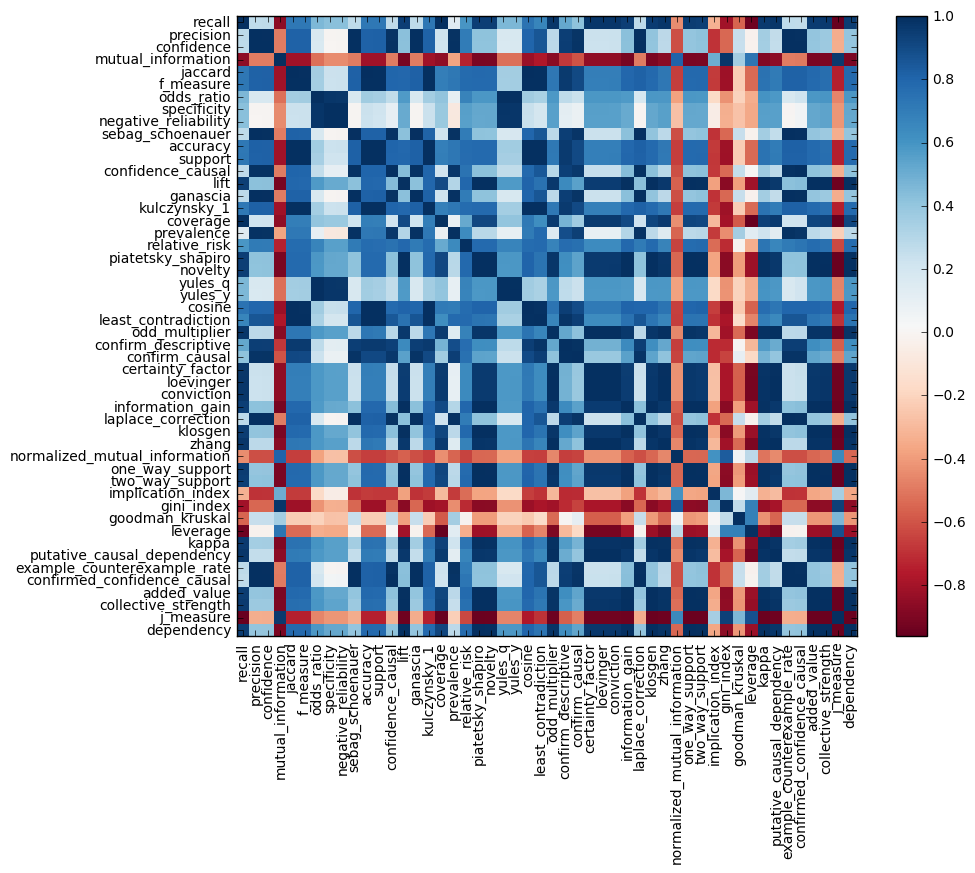

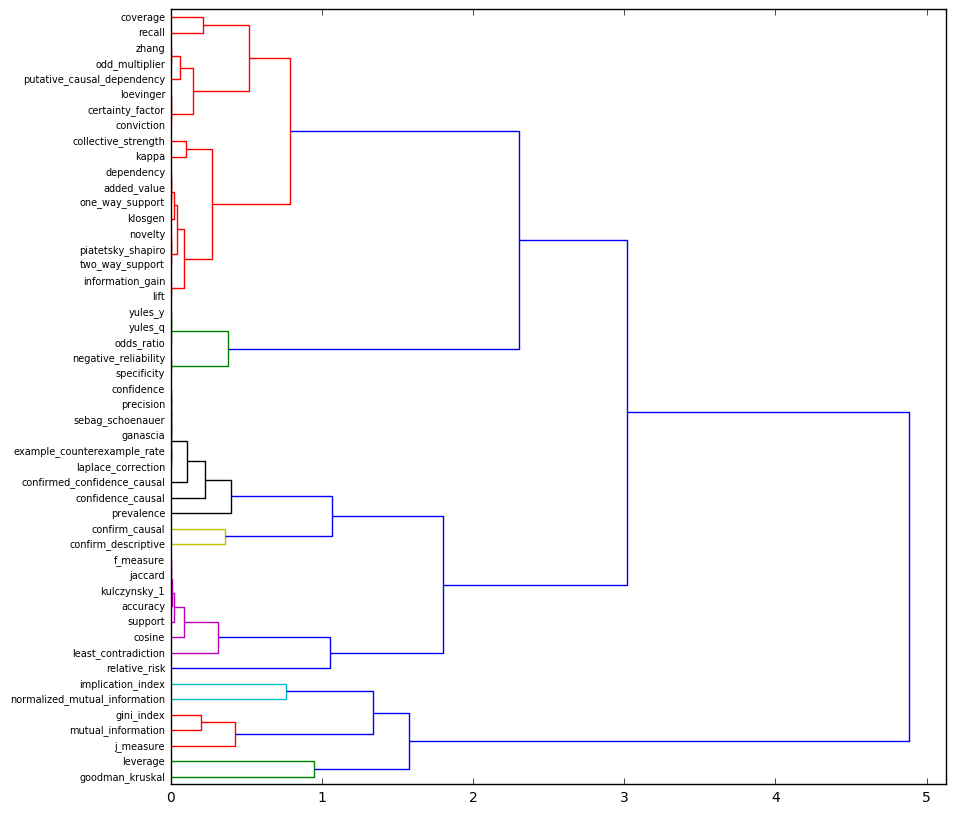

In [4]:
ranks_matrix.visualize()

31


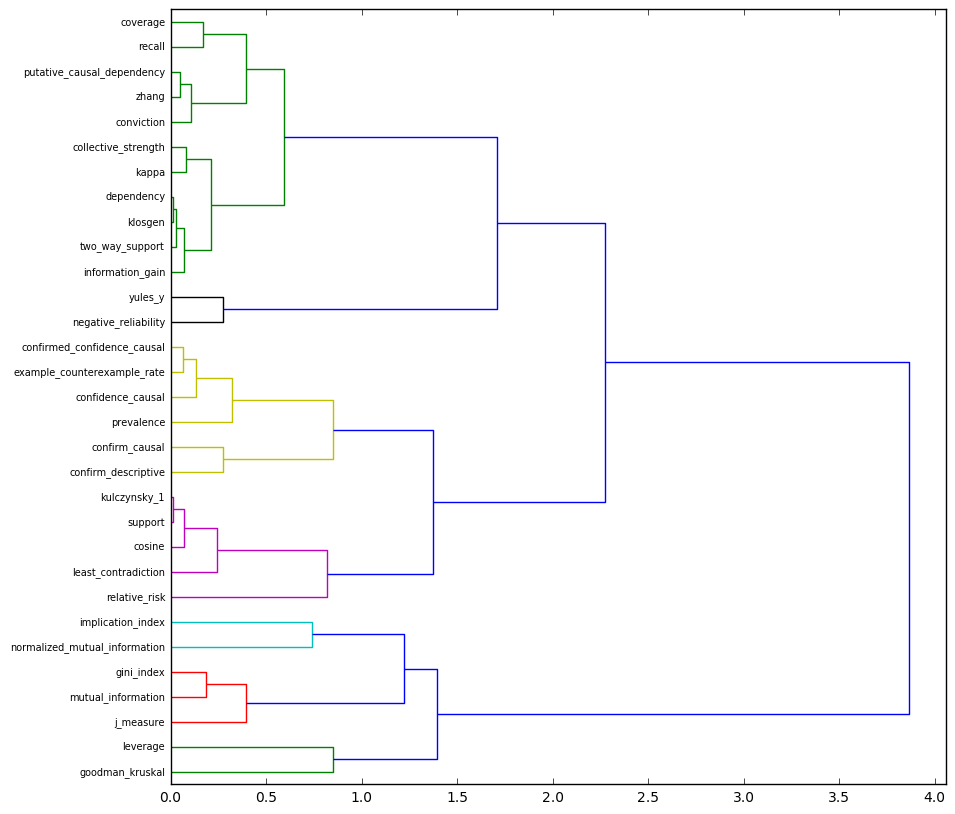

In [18]:
def find_redundant(measures_arr, ranks_matrix):
#     print(len(measures_arr))
    for i in range(len(measures_arr)):
        for j in range(len(measures_arr)):
            if (i > j):
#                 print(ranks_matrix)
                if (np.around(ranks_matrix.corr_spearman[i][j], 4) == 1):
#                     print(measures_arr[i],measures_arr[j], ranks_matrix.corr_spearman[i][j]);
                    return(j);

# remove redundant measures
while find_redundant(measures_arr, ranks_matrix):
    i = find_redundant(measures_arr, ranks_matrix);
    measures_dict, measures_arr = ranks_matrix.remove_outliers(i);
    
print(len(measures_arr))
ranks_matrix.show_dendrogram()

In [19]:
def find_outlier(clusters):
    arr = []
    for i in range(len(clusters)):
        if len(clusters[i]) == 1:
            arr.append(clusters[i]);
    return np.array(arr);


# while len(find_outlier(clusters)):
#     idx_outliers = find_outlier(clusters);
#     print(measures_arr[idx_outliers]);
#     measures_dict, measures_arr = ranks_matrix.remove_outliers(idx_outliers);
#     clusters = ranks_matrix.form_clusters(n_clusters);

In [20]:
def form_clusters(n_clusters=10, ranks_matrix=ranks_matrix):
    # n_clusters = 10;
    clusters = ranks_matrix.form_clusters(n_clusters);
    return clusters

#prints the measures list in each of the clusters
def print_cluster_set(clusters, ma):
    for idx, cluster in enumerate(clusters):
        print(len(cluster), cluster);        
        print(ma[cluster]);

#forms a cluster vector corresponding to the lengths of the clusters
def form_cluster_set(clusters):
    cluster_vector = np.empty(len(clusters), int);
    for idx, cluster in enumerate(clusters):
        cluster_vector[idx] = len(cluster);
    return cluster_vector;

In [21]:
def cluster_set_1():
    rm = IMR.ranks(IMR.scores_matrix_sparse, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(8, rm);
    
    misc_cluster1 = np.array([], int);
    misc_cluster1 = np.append(misc_cluster1, clusters[0]);
    misc_cluster1 = np.append(misc_cluster1, clusters[2]);
    
    misc_cluster2 = np.array([], int);
    misc_cluster2 = np.append(misc_cluster2, clusters[6]);
    misc_cluster2 = np.append(misc_cluster2, clusters[7]);
    
    clusters_new = [];
    clusters_new.append(clusters[1]);
    clusters_new.append(clusters[3]);
    clusters_new.append(clusters[4]);
    clusters_new.append(clusters[5]);
    clusters_new.append(misc_cluster1);
    clusters_new.append(misc_cluster2);

    clusters_new = np.array(clusters_new);

    return (clusters_new, md, ma);


In [22]:
def cluster_set_2():
    rm = IMR.ranks(IMR.scores_matrix_dense, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(2, rm);
    return (clusters, md, ma);

In [23]:
def cluster_set_3():
    rm = IMR.ranks(IMR.scores_matrix_dense, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(3, rm);
    return (clusters, md, ma);

In [24]:
def cluster_set_4():
    rm = IMR.ranks(IMR.scores_matrix_dense, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(4, rm);
    return (clusters, md, ma);

In [25]:
def cluster_set_5():
    rm = IMR.ranks(IMR.scores_matrix_dense, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(6, rm);
    return (clusters, md, ma);

In [26]:
# def cluster_set_5():
#     rm = IMR.ranks(IMR.scores_matrix_dense, IMR.measures_arr);
#     ma = rm.measures_arr;
#     md = rm.measures_dict;
#     rm.compute_correlation();
    
#     while find_redundant(ma, rm):
#         i = find_redundant(ma, rm);
#         md, ma = rm.remove_outliers(i);
    
#     clusters = form_clusters(8, rm);
#     misc_cluster1 = np.array([], int);
#     misc_cluster1 = np.append(misc_cluster1, clusters[1]);
#     misc_cluster1 = np.append(misc_cluster1, clusters[4]);
#     misc_cluster1 = np.append(misc_cluster1, clusters[7]);
    
#     misc_cluster2 = np.array([], int);
#     misc_cluster2 = np.append(misc_cluster2, clusters[3]);
#     misc_cluster2 = np.append(misc_cluster2, clusters[5]);
    
#     clusters_new = [];
#     clusters_new.append(clusters[0]);
#     clusters_new.append(clusters[2]);
#     clusters_new.append(clusters[6]);
#     clusters_new.append(misc_cluster1);
#     clusters_new.append(misc_cluster2);

#     clusters_new = np.array(clusters_new);

#     return (clusters_new, md, ma);


In [27]:
def cluster_set_tew_2():
    
    from Measures import form_measures_dict;
    rm = IMR.ranks(IMR.scores_matrix_dense, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    def form_cluster_array(md):
        clusters = [];

        clusters.append([md['support'], md['prevalence'], md['least_contradiction'], 
                         md['example_counterexample_rate'], md['confirm_descriptive'], md['leverage'], 
                         md['confidence_causal'], md['confirmed_confidence_causal'], 
                         md['conviction'], md['zhang'], md['yules_y'], md['confirm_causal'], 
                         md['putative_causal_dependency'], md['klosgen'], md['dependency'], 
                         md['one_way_support'], md['goodman_kruskal'], md['accuracy'], 
                         md['cosine'], md['kulczynsky_1'], md['information_gain'], 
                         md['novelty'], md['two_way_support'], md['collective_strength'], 
                         md['kappa'], md['mutual_information'], md['j_measure'], 
                         md['gini_index'], md['normalized_mutual_information'], md['laplace_correction']]);
        
        clusters.append([md['recall'], md['negative_reliability'], md['relative_risk'], md['coverage'], md['implication_index']]);
        clusters = np.array(clusters);
        return clusters
    
    clusters = form_cluster_array(md);
    
    clusters_flat = np.empty(0, int);
    
    for cluster in clusters:
        clusters_flat = np.append(clusters_flat, cluster);
    
    ma = ma[clusters_flat];
    md = form_measures_dict(ma);

    clusters = form_cluster_array(md);

    return (clusters, md, ma);

(clusters_tew_2, measures_dict_tew_2, measures_arr_tew_2) = cluster_set_tew_2();

In [28]:
def cluster_set_tew_4():
    
    from Measures import form_measures_dict;
    rm = IMR.ranks(IMR.scores_matrix_dense, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    def form_cluster_array(md):
        clusters = [];

        clusters.append([md['support'], md['prevalence'], md['least_contradiction'], 
                         md['example_counterexample_rate'], md['confirm_descriptive'], md['laplace_correction']]);
        clusters.append([md['leverage'], md['confidence_causal'], md['confirmed_confidence_causal'], 
                         md['conviction'], md['zhang'], md['yules_y'], md['confirm_causal'], 
                         md['putative_causal_dependency'], md['klosgen'], md['dependency'], 
                         md['one_way_support'], md['goodman_kruskal'], md['accuracy'], 
                         md['cosine'], md['kulczynsky_1'], md['information_gain'], 
                         md['novelty'], md['two_way_support'], md['collective_strength'], 
                         md['kappa'], md['mutual_information'], md['j_measure'], 
                         md['gini_index'], md['normalized_mutual_information']]);
        
        clusters.append([md['recall'], md['negative_reliability'], md['relative_risk']]);
        clusters.append([md['coverage'], md['implication_index']]);
                        
        clusters = np.array(clusters);
        return clusters
    
    clusters = form_cluster_array(md);
    
    clusters_flat = np.empty(0, int);
    
    for cluster in clusters:
        clusters_flat = np.append(clusters_flat, cluster);
    
    ma = ma[clusters_flat];
    md = form_measures_dict(ma);

    clusters = form_cluster_array(md);

    return (clusters, md, ma);

In [29]:
def cluster_set_tew_5():
    
    from Measures import form_measures_dict;
    rm = IMR.ranks(IMR.scores_matrix_dense, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    def form_cluster_array(md):
        clusters = [];

        clusters.append([md['support'], md['prevalence'], md['least_contradiction'], 
                         md['example_counterexample_rate'], md['confirm_descriptive'], md['laplace_correction']]);
        clusters.append([md['leverage'], md['confidence_causal'], md['confirmed_confidence_causal'], 
                         md['conviction'], md['zhang']]);
        clusters.append([md['yules_y'], md['confirm_causal'], md['putative_causal_dependency'], 
                         md['klosgen'], md['dependency'], md['one_way_support'],
                         md['goodman_kruskal'], md['accuracy'], 
                         md['cosine'], md['kulczynsky_1'], md['information_gain'], 
                         md['novelty'], md['two_way_support'], md['collective_strength'], 
                         md['kappa'], md['mutual_information'], md['j_measure'], 
                         md['gini_index'], md['normalized_mutual_information']]);
        
        clusters.append([md['recall'], md['negative_reliability'], md['relative_risk']]);
        clusters.append([md['coverage'], md['implication_index']]);
                        
        clusters = np.array(clusters);
        return clusters
    
    clusters = form_cluster_array(md);
    
    clusters_flat = np.empty(0, int);
    
    for cluster in clusters:
        clusters_flat = np.append(clusters_flat, cluster);
    
    ma = ma[clusters_flat];
    md = form_measures_dict(ma);

    clusters = form_cluster_array(md);

    return (clusters, md, ma);

In [30]:
(clusters_1, measures_dict_1, measures_arr_1) = cluster_set_1();
(clusters_2, measures_dict_2, measures_arr_2) = cluster_set_2();
(clusters_3, measures_dict_3, measures_arr_3) = cluster_set_3();
(clusters_4, measures_dict_4, measures_arr_4) = cluster_set_4();
(clusters_5, measures_dict_5, measures_arr_5) = cluster_set_5();
(clusters_tew_2, measures_dict_tew_2, measures_arr_tew_2) = cluster_set_tew_2();
(clusters_tew_4, measures_dict_tew_4, measures_arr_tew_4) = cluster_set_tew_4();
(clusters_tew_5, measures_dict_tew_5, measures_arr_tew_5) = cluster_set_tew_5();

In [56]:
def return_homogeneity(cluster_set, measures_dict):

    #old properties
#     (properties_array, property_names, support_array, entropy_array) = compute_invariance.compute_property_vectors(measures_dict);

    # new properties
    (properties_array, property_names) = compute_invariance.compute_new_property_vectors(measures_dict);
# mapping the properties array to the combination of the properties
    (properties_array, property_names) = compute_invariance.map_UN_properties_to_combinations(properties_array);
    (support_array, entropy_array) = compute_invariance.compute_supports_updated(properties_array);
    
    cluster_property_array = compute_invariance.compute_property_frequencies_in_cluster_set_updated(properties_array, cluster_set);
    cluster_vector = form_cluster_set(cluster_set);
    print(cluster_vector);
#     print(properties_array)
    for idx, property_vector in enumerate(cluster_property_array):
        # property_vector is (n_prop_states, n_clusters)
        homo = compute_invariance.compute_homogeneity(property_vector, cluster_vector)
        # Property names
#         print(property_names[idx]);

        # Entropy of split
#         print(entropy_array[idx]);
        
    
    #-----old properties------
        # Original split of properties
#         print([int(np.sum(property_vector[1,:])), int(np.sum(property_vector[0,:]))])

#         print(support_array[idx,1]);     #prints support for each prop_state

        
        # property counts of '-1' in new and '0' in old
#         print(property_vector[0,:]);
        
        # property counts of '0' in new and '1' in old
#         print(property_vector[1,:]);
#         print(homo)        
    
    #------new properties------
        # Original split of properties
#         print([int(np.sum(property_vector[0,:])),
#                int(np.sum(property_vector[1,:])),
#                int(np.sum(property_vector[2,:])),
#                int(np.sum(property_vector[3,:])),
#                int(np.sum(property_vector[4,:])),
#                int(np.sum(property_vector[5,:]))]);

#         print(support_array[idx,0]);     #prints support for each prop_state

        # property counts of '-1' in new 
#         print(property_vector[0,:]);
        
        # property counts of '0' in new
#         print(property_vector[1,:]);
        
        # property counts of '1' in new
#         print(property_vector[2,:]);

        print(homo)

return_homogeneity(clusters_4, measures_dict_4);

[11  7  2 11]
0.457229626317
0.544339519056
0.547642274978
0.556540432664
0.497725783722
0.541324875958
0.612574501847
0.597036590069
0.482187871945
0.568051531217
0.594256010312
0.597558766235
0.441203780621
0.541324875958
0.558308842295
0.562658010591


In [ ]:
# input a cluster set and specify which property and output will be the measures satisfying the properties and their cluster
def cluster_measures_satisfying_property(cluster_set, measures_arr, measures_dict):
    (properties_array, property_names, support_array, entropy_array) = compute_invariance.compute_property_vectors(measures_dict);
    for idx, cluster in enumerate(cluster_set):
        for idc, measure in enumerate(cluster):
            if (properties_array[measure, 7]):
                print(measures_arr[measure], idx)
                
cluster_measures_satisfying_property(clusters_4, measures_arr_4, measures_dict_4)

In [ ]:
ranks_matrix.show_dendrogram()